In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

%matplotlib inline

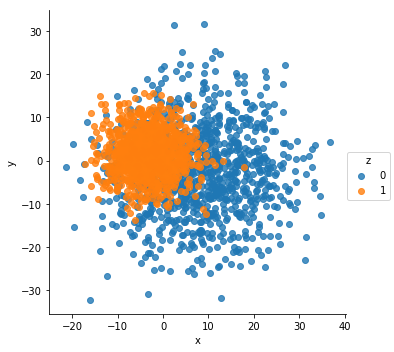

In [2]:
n = 1000

x1 = np.random.uniform(size=n) + np.random.randint(-5,5) + np.random.randn(n) * 5
y1 = np.random.uniform(size=n) + np.random.randint(-5,5) + np.random.randn(n) * 5

x2 = np.random.uniform(size=n) + np.random.randint(-10,10) + np.random.randn(n) * 10
y2 = np.random.uniform(size=n) + np.random.randint(-10,10) + np.random.randn(n) * 10

df = pd.DataFrame()
df["x"] = np.append(x1,x2)
df["y"] = np.append(y1,y2)
df["z"] = np.append(np.repeat(1,n),np.repeat(0,n))
sns.lmplot("x", "y", data = df, hue = "z", fit_reg = False)

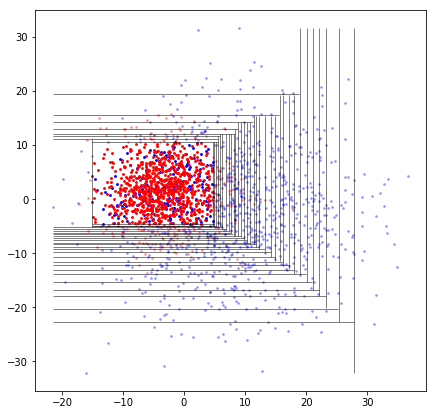

In [3]:
# minimum support
threshold = 0.5

# peeling-off ratio
alpha = .01

# convert to array
data = df.sort_values(by = "x").values
n_total = data.shape[0]

# plot
plt.figure(figsize=(7,7))

d1 = data[data[:, 2] == 0]
d2 = data[data[:, 2] == 1]

plt.scatter(d1[:, 0], d1[:, 1], s=3, color = "blue", alpha = 0.3)
plt.scatter(d2[:, 0], d2[:, 1], s=3, color = "red", alpha = 0.3)
mu = data[:,-1].mean()

# start from each feature (one-by-one)
support = 1.0
boxes = []
boxes.append(data)
while support > threshold:
    result = []
    for i in range(2):
        feat = data[:,i]

        # divide space into 2 (xj = boundary)
        mus = [] # mu
        ids = [] # indices
        bs = [] # xjs boundaries

        qs = [alpha, 1-alpha]
        for q in qs:
            xj = np.percentile(feat, q = q*100)
            bs.append(xj)
            if q == alpha:
                b_remain = data[:, i] >= xj
            else:
                b_remain = data[:, i] < xj
            data_remain = data[b_remain]
            mu_remain = data_remain[:,-1].mean()
            ids.append(b_remain)
            mus.append(mu_remain - mu)
        mus = np.array(mus)

        data = data[ids[mus.argmax()]]
        boxes.append(data)
        xj = bs[mus.argmax()]

        if i == 0:
            plt.vlines(xj, data[:,1].min(), data[:,1].max(), lw = 0.5)
        else:
            plt.hlines(xj, data[:,0].min(), data[:,0].max(), lw = 0.5)

        result.append({xj: data})
    n_ = data.shape[0]

    support = n_ / n_total

d1 = data[data[:, 2] == 0]
d2 = data[data[:, 2] == 1]

plt.scatter(d1[:, 0], d1[:, 1], s=3, color = "blue")
plt.scatter(d2[:, 0], d2[:, 1], s=3, color = "red")

(0, 1.2)

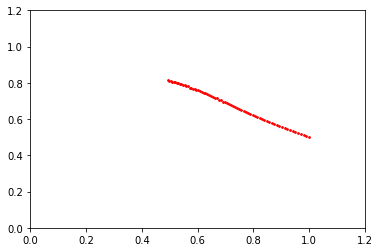

In [4]:
for i in range(len(boxes)):
    box = boxes[i]
    plt.scatter(len(box) / 2 / n, np.count_nonzero(box[:, -1]) / len(box), color = "red", s = 3)
plt.xlim(0,1.2)
plt.ylim(0,1.2)

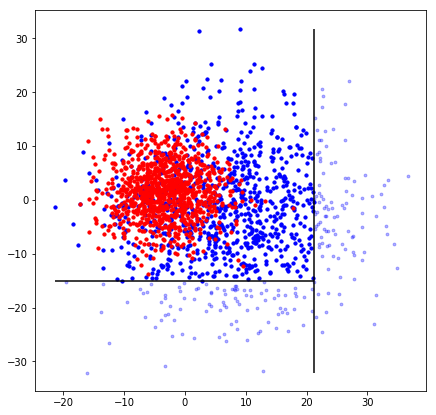

In [5]:
# minimum support
support = 0.2

# peeling-off ratio
alpha = .05

# convert to array
data = df.sort_values(by = "x").values

# plot
plt.figure(figsize=(7,7))

d1 = data[data[:, 2] == 0]
d2 = data[data[:, 2] == 1]

plt.scatter(d1[:, 0], d1[:, 1], s=8, color = "blue", alpha = 0.3)
plt.scatter(d2[:, 0], d2[:, 1], s=8, color = "red", alpha = 0.3)
mu = data[:,-1].mean()

# start from each feature (one-by-one)
result = []
for i in range(2):
    feat = data[:,i]

    # divide space into 2 (xj = boundary)
    mus = [] # mu
    ids = [] # indices
    bs = [] # xjs boundaries

    qs = [alpha, 1-alpha]
    for q in qs:
        xj = np.percentile(feat, q = q*100)
        bs.append(xj)
        if q == alpha:
            b_remain = data[:, i] >= xj
        else:
            b_remain = data[:, i] < xj
        data_remain = data[b_remain]
        mu_remain = data_remain[:,-1].mean()
        ids.append(b_remain)
        mus.append(mu_remain - mu)
    mus = np.array(mus)

    data = data[ids[mus.argmax()]]
    xj = bs[mus.argmax()]
    
    if i == 0:
        plt.vlines(xj, data[:,1].min(), data[:,1].max())
    else:
        plt.hlines(xj, data[:,0].min(), data[:,0].max())

    result.append({xj: data})

d1 = data[data[:, 2] == 0]
d2 = data[data[:, 2] == 1]

plt.scatter(d1[:, 0], d1[:, 1], s=10, color = "blue")
plt.scatter(d2[:, 0], d2[:, 1], s=10, color = "red")